In [1]:
import experiments.runners as runners

In [2]:
from tabpfn import TabPFNClassifier
from sklearn.ensemble import RandomForestClassifier
from data import load_us_perm_visas 

In [11]:
model = RandomForestClassifier()
# model = TabPFNClassifier()

In [12]:
new_run = runners.run(model, load_us_perm_visas)

loading data
trying get pipeline
RandomForest model detected.


In [13]:
new_run.pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('datetime',
                                                  DatetimeFeatureExtractor(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x33921bb30>),
                                                 ('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x33921b5c0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17368cb00>)])),
                ('classifier', RandomForestClassifier())])

In [6]:
import warnings
# Ignore FutureWarning, of which TabPFNClassifier has a lot!
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
new_run.X_train

,decision_date,employer_name,employer_city,employer_state,job_info_work_city,job_info_work_state,pw_soc_code,pw_unit_of_pay_9089,pw_source_name_9089,pw_soc_title,country_of_citizenship,class_of_admission,pw_level_9089,pw_amount_9089,wage_offer_unit_of_pay_9089
9880,2011-10-28,microsoft corporation,redmond,wa,redmond,wa,15-1031.00,yr,oes,"computer software engineers, applications",NaN,parolee,level ii,82701.0,yr
332404,2016-08-09,lexington insurance company,new york,ny,boston,ma,41-3021,yr,oes,insurance sales agents,lebanon,h-1b,level iv,97302.0,yr
347023,2016-09-22,intel corporation,santa clara,ca,santa clara,ca,17-2072,yr,oes,"electronics engineers, except computer",india,f-1,level ii,108992.0,yr
298526,2016-05-10,"aon national flood services, inc.",kalispell,mt,kalispell,mt,15-1132,yr,oes,"software developers, applications",india,h-1b,level ii,70637.0,yr
22335,2012-10-05,"vertex lcd, inc.",placentia,ca,placentia,ca,51-1011.00,yr,oes,first-line supervisors/managers of production ...,south korea,h-1b,level iv,67246.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124299,2013-11-22,"hattiesburg clinic, pa",hattiesburg,ms,hattiesburg,ms,29-1063,hr,oes,"internists, general",peru,h-1b,level ii,90.0,NaN
274016,2016-03-02,whi hotel llc,wilsonville,or,wilsonville,or,35-3041,yr,oes,"food servers, nonrestaurant",south korea,NaN,level i,19365.0,yr
140569,2014-10-16,"micron technology, inc.",boise,id,manassas,va,11-9041,yr,other,architectural and engineering managers,india,h-1b,NaN,"91,640.00",yr
155916,2015-02-12,"medtronic, inc.",minneapolis,mn,mounds view,mn,15-2041,yr,oes,statisticians,canada,h-1b,level ii,"70,304.00",yr


In [15]:
new_run.fit()

Fitting model...
DONE: RandomForestClassifier fit


In [16]:
new_run.predict()

DONE: RandomForestClassifier predict


Accuracy 0.9471881404947076
F1 Score: 0.7200913986568809

Classification Report:
              precision    recall  f1-score   support

   certified      0.950     0.996     0.972    132174
      denied      0.860     0.321     0.468     10294

    accuracy                          0.947    142468
   macro avg      0.905     0.659     0.720    142468
weighted avg      0.943     0.947     0.936    142468



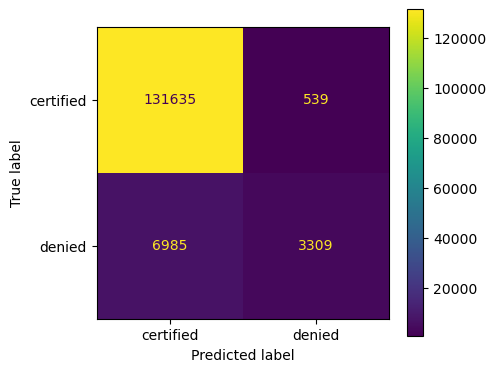

In [17]:
new_run.score()

## Codeexamples

### label coder example

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
predictions_encoded = le.transform(predictions)

# Now calculate F1 score with numeric labels
print("F1 Score:", f1_score(y_test_encoded, predictions_encoded))

### Dan's random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
predictions_rf = model.predict(X_test)

### Dan's catboost

In [ ]:
# if you don't have GPU and cuda, change task_type
# note: catboost requires python 3.12, so need to set up a new evironment (ok, since tabpfn requires only python > 3.9)
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0:1')#, class_weights=class_weights)
model.fit(X_res,
          y_res)